Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


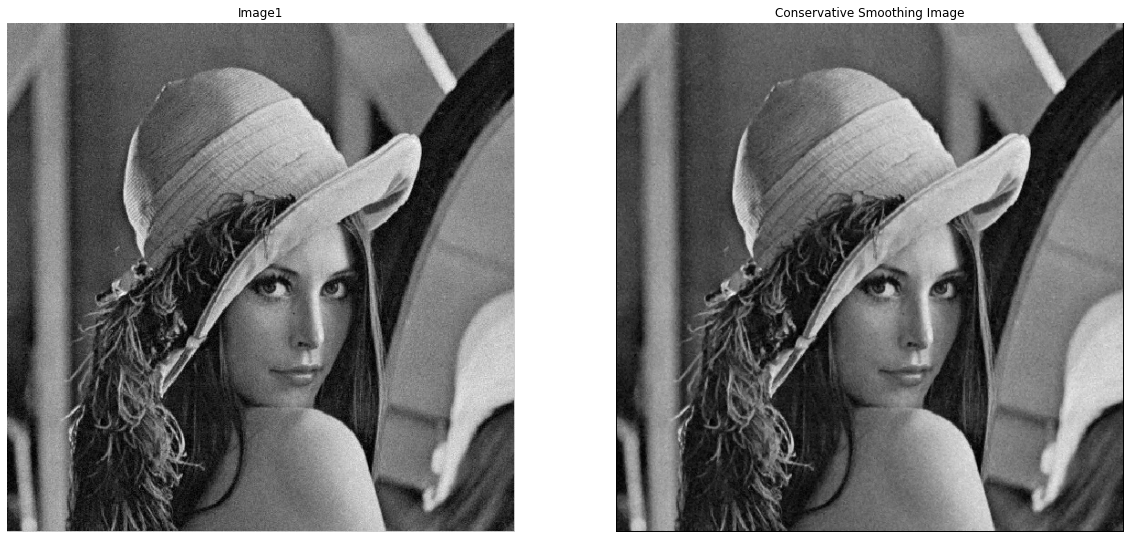

In [26]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive') 
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/Lena-Gaussian-noise1.jpg')

# color영상을 gray영상으로 만들기
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
output_img = np.zeros((img.shape[0],img.shape[1]))
center=0
current=0
min=255;
max=0;
ed=1 # 3x3커널일 경우 1, 5x5 커널일 경우 2

for h in range(ed,img.shape[0]-ed,1):
  for w in range(ed, img.shape[1]-ed,1):
      #초기값 설정
      center = gray_img[h,w]
      min = gray_img[h-ed,w-ed]
      max = gray_img[h-ed,w-ed]
      #최대, 최소 구하기
      for m in range(-ed,ed,1):
         for n in range(-ed,ed,1):
            if( m==0 and n==0):
              continue
            else:
              current = gray_img[h+m,w+n]
            if (min > current):
              min = current
            if (max < current):
              max = current   
      if (center> min and center < max):
        output_img[h,w] = center
      elif (center > max):
        center = max
      elif (center < min):
        center = min
      output_img[h,w] = center

#그림을 화면에 출력
plt.figure(figsize=(20,20))# 영상의 크기를 키워주자
plt.subplot(1,2,1)
plt.title("Image1")
plt.imshow(gray_img, cmap='gray')
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Conservative Smoothing Image")
plt.imshow(output_img, cmap='gray')
plt.axis("off")
plt.show()

In [ ]:
)